In [7]:

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Load the digits dataset
test_df = pd.read_csv('optdigits.tes', header=None)
train_df = pd.read_csv('optdigits.tra', header=None)
train_df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [2]:
# Split into training and test sets
# The training set is used to learn the patterns, the test set is used to evaluate generalization.
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# Create the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Tuning
### - We will choose to tune the parameter **max_depth** as it controls complexity and efficiency of our model.
### - By finding the best value of max_depth, you can avoid overfitting or underfitting of data and ensure your model works well with both the training and the test data.

In [3]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30]
}

# Create the base model
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy:.4f}")

Best parameters: {'max_depth': 20}
Best cross-validation accuracy: 0.9786
Test accuracy: 0.9672


By testing different values of max_depth we can see which is the best one to use in our model. This has given us a best max_depth value of 10 which we can now use in a tuned model

In [4]:
# Parameter Tuning for max_depth
# Test with a selected depth
tuned_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
tuned_model.fit(X_train, y_train)

# Evaluate on test data
y_pred = tuned_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9671675013912076


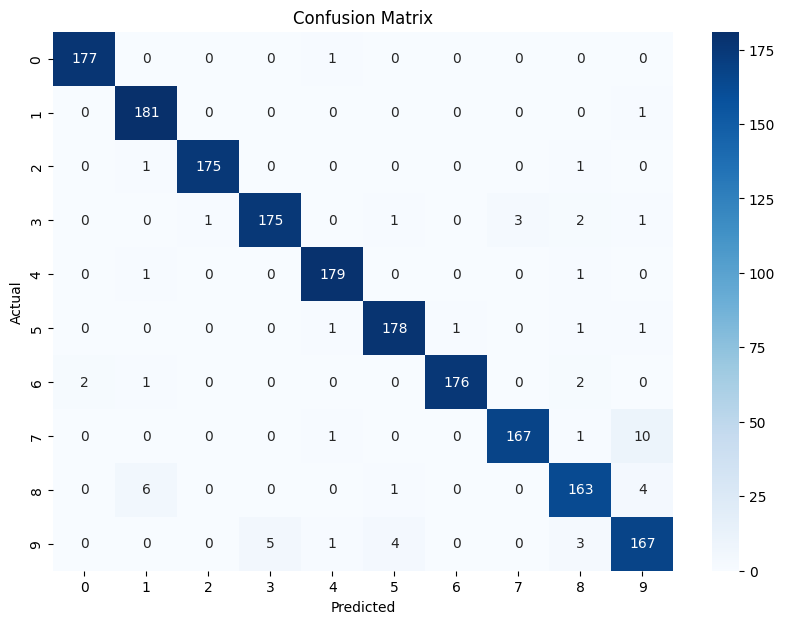

In [5]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
# Identify the class with highest number of misclassifications
misclassified_counts = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
worst_class = np.argmax(misclassified_counts)
print(f"Class with the most misclassifications: {worst_class} ({misclassified_counts[worst_class]} times)")

# Report metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("\n--- Classification Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

class_report = classification_report(y_test, y_pred)
print(class_report)

Class with the most misclassifications: 9 (13 times)

--- Classification Metrics ---
Accuracy:  0.9672
Precision: 0.9675
Recall:    0.9671
F1 Score:  0.9671
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.95      0.99      0.97       182
           2       0.99      0.99      0.99       177
           3       0.97      0.96      0.96       183
           4       0.98      0.99      0.98       181
           5       0.97      0.98      0.97       182
           6       0.99      0.97      0.98       181
           7       0.98      0.93      0.96       179
           8       0.94      0.94      0.94       174
           9       0.91      0.93      0.92       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



## Analysis:
- The higher classes tend to have many more misclassifications than the lower ones, and this is verified when looking at the metrics output. Precision, recall and f1-score are the lowest for class 9. 

- Classification metrics are consistent with the data shown in the confusion matrix in showing that our model is performing almost perfectly.